# INTRODUCCIÓN A PANDAS
Dr. Edwin Villanueva (ervillanueva@pucp.edu.pe)

# Trabajando con PANDAS
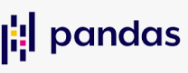

A pesar que NumPy es muy eficiente para trabajar con arrays, esta ha sido optimizada para trabajar con datos homogéneos que se puedan acceder con índices enteros. Sin embargo, las necesidades actuales de análisis de datos son variadas: diversidad de fuentes de datos, datos heterogéneos, datos faltantes,  datos no estructurados, operaciones avanzadas con los datos y otras formas de indexación (ejm. el tiempo). Pandas fue creado justamente para suplir esas demandas. Pandas provee dos estructuras de datos importantes <b>Series</b> y <b>DataFrame</b>. Series es para trabajar con datos de 1 dimensión, mientras que DataFrame es para trabajar con datos de 2 dimensiones (tablas). Detrás de estas estructuras están arrays NumPy, por lo que existe una alta compatibilidad entre arrays numpys y objetos Pandas. Sin embargo, Pandas ofrece una serie de funcionalidades de alto nivel que facilitan el trabajo de manipulación de datos.

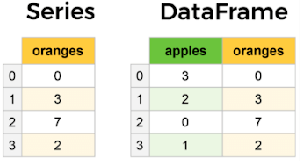

In [1]:
# Importa la libreria NumPy y le da el alias np (para facilidad de tipeo)
import numpy as np

# Importa la libreria Pandas y le da el alias pd (para facilitar el tipeo)
import pandas as pd

## Series
Series es un tipo de array unidimensional, donde a cada elemento se le puede asociar una etiqueta (<b>índice</b>). A diferencia de un array NumPy que solo acepta indexación con enteros no negativos, los índices en un objeto Series pueden ser de cualquier tipo, como por ejemplo strings o el tiempo. Un objeto Series puede aceptar datos faltantes (a diferencia de NumPy).

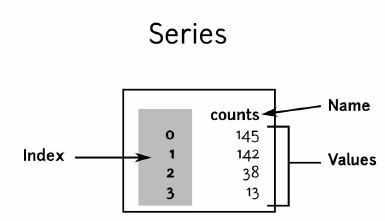

In [2]:
# Crea una serie a partir de una lista. El indice por defecto son enteros secuenciales empezando en 0
serie = pd.Series([100, 200, 300, 400, 500])
serie

,0
0,100
1,200
2,300
3,400
4,500


In [3]:
type(serie)

pandas.core.series.Series

In [4]:
# Crea una serie con un elemento repetido 8 veces
serie = pd.Series(40, index = range(2, 10))  # El indice es numerico y generado con range()
serie

,0
2,40
3,40
4,40
5,40
6,40
7,40
8,40
9,40


In [5]:
# Crea una serie con un indice especificado
serie = pd.Series([100, 200, 300, 400, 500], index=['Juan', 'Juan', 'Jorge', 'Daniel', 'Pamela'])
serie

,0
Juan,100
Juan,200
Jorge,300
Daniel,400
Pamela,500


In [6]:
# Se puede acceder a los elementos de una serie con indexación numerica (como un array numpy)
serie[-3:]  # Extrae los 3 ultimos elementos

,0
Jorge,300
Daniel,400
Pamela,500


In [7]:
# Tambien se puede acceder a los elementos por el indice
serie[['Daniel', 'Juan']]  # Recupera los elementos con indices 'Juan' y 'Daniel'

,0
Daniel,400
Juan,100
Juan,200


In [8]:
serie

,0
Juan,100
Juan,200
Jorge,300
Daniel,400
Pamela,500


Los valores del índice de una serie se pueden acceder con la propiedad <font color=blue>.index</font>

In [9]:
serie.index

Index(['Juan', 'Juan', 'Jorge', 'Daniel', 'Pamela'], dtype='object')

Se puede hacer operaciones aritméticas con la serie:

In [10]:
serie1 = serie * 2
serie1

,0
Juan,200
Juan,400
Jorge,600
Daniel,800
Pamela,1000


In [11]:
squared_serie = serie ** 2  # Eleva al cuadrado los elementos de la serie
squared_serie

,0
Juan,10000
Juan,40000
Jorge,90000
Daniel,160000
Pamela,250000


Se puede hacer copia profunda de series:

In [14]:
otraserie = serie.copy()  # Copia profunda

In [15]:
serie['Juan'] = 5000
serie

,0
Juan,5000
Juan,5000
Jorge,300
Daniel,400
Pamela,500


In [16]:
otraserie

,0
Juan,5000
Juan,5000
Jorge,300
Daniel,400
Pamela,500


### Índices temporales
Pandas provee el objeto <b>Timestamp</b> para almacenar información de tiempo. Una colección de objetos Timestamp se llama <b>DatetimeIndex</b> que puede servir para indexar una <b>Series</b> o un <b>Dataframe</b> (más adelante se presentan ejemplos de esto).

In [17]:
# Crea un timestamp
pddate = pd.to_datetime("28th of July, 2020")
pddate

Timestamp('2020-07-28 00:00:00')

In [19]:
# Crea un indice temporal
dtindex = pd.to_datetime(['4th of July, 2015', '2015-Jul-6', '07.07.2015', '20150708'], format='mixed')
dtindex

DatetimeIndex(['2015-07-04', '2015-07-06', '2015-07-07', '2015-07-08'], dtype='datetime64[ns]', freq=None)

In [20]:
# Crea una serie indexada en tiempo a partir de un indice pasado
serie = pd.Series([100, 200, 300, 400], index = dtindex)
serie

,0
2015-07-04,100
2015-07-06,200
2015-07-07,300
2015-07-08,400


Con la funcion **date_range** de pandas podemos crear un rango de timestamps con una determinada frecuencia.

In [21]:
# Crea un rango de 6 fechas a frecuencia diaria, empezando el 2020-07-28
pd.date_range(start='2020-07-28', periods = 6, freq = 'D')

DatetimeIndex(['2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
               '2020-08-01', '2020-08-02'],
              dtype='datetime64[ns]', freq='D')

In [22]:
# Crea una serie con indice igual al rango de fechas anterior
serie = pd.Series([2, 4, 3, 1, 5, 8], index = pd.date_range('2020-07-28', periods = 6, freq = 'D'))
serie

,0
2020-07-28,2
2020-07-29,4
2020-07-30,3
2020-07-31,1
2020-08-01,5
2020-08-02,8


In [23]:
# Devuelve los elementos de la serie que son de Julio de 2020
serie['2020-08']

,0
2020-08-01,5
2020-08-02,8


## DataFrames
DataFrame es el otro tipo de objeto de pandas usado para manipular data tipo tabla, donde a cada fila se le puede asociar una etiqueta (índice). Esta estructura es muy conveniente para muchas tareas de Data Science. Cada columna en un DataFrame puede verse como una serie, que puede tener tipos diferentes de datos.

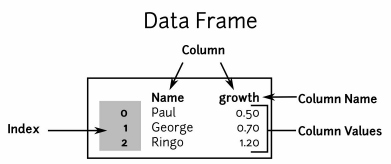

## Creando DataFrames

Para crear un dataframe se usa el método de pandas **.DataFrame**. Una forma  simple para crear un dataframe es especificar las columnas como un diccionario, cada entry es una columna cuyo key es el nombre de la columna.

In [24]:
# Crea un DataFrame a partir de un diccionario. Se crea un indice numerico por defecto
notas_dict = {'Juan': [18, 16, 15], 'Maria': [11, 18, 16], 'Pedro': [10, 11, 13]}
df = pd.DataFrame(notas_dict)
df

,Juan,Maria,Pedro
0,18,11,10
1,16,18,11
2,15,16,13


También, se puede crear un dataframe a partir de un diccionario de Series. En este caso, se puede indicar los índices de las filas en cada serie. Datos faltantes se indican con valores **NaN** (Not a Number).

In [25]:
dicnotas = {'Juan'  : pd.Series([18, 16, 15], index = ['nota_a', 'nota_b', 'nota_c']),
            'Maria' : pd.Series([11, 18, 16], index = ['nota_b', 'nota_c', 'nota_d']),
            'Pedro' : pd.Series([11, 13], index = ['nota_a', 'nota_d'])}

dfnotas = pd.DataFrame(dicnotas)
dfnotas

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_b,16.0,11.0,NaN
nota_c,15.0,18.0,NaN
nota_d,NaN,16.0,13.0


Para ver las dimensiones del DataFrame se usa la propiedad **.shape**:

In [26]:
dfnotas.shape

(4, 3)

Se puede acceder a los índices con la propiedad **.index**:

In [27]:
dfnotas.index

Index(['nota_a', 'nota_b', 'nota_c', 'nota_d'], dtype='object')

Se puede acceder a los nombres de las columnas con la propiedad **.columns**:

In [28]:
dfnotas.columns

Index(['Juan', 'Maria', 'Pedro'], dtype='object')

## Accediendo a datos del DataFrame

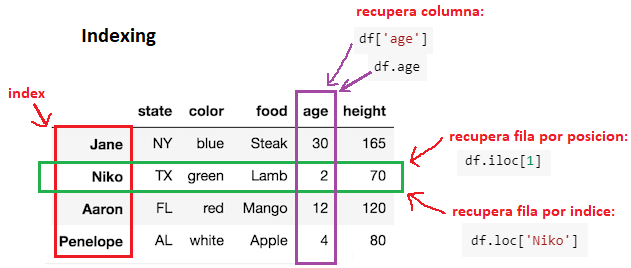

In [29]:
dfnotas

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_b,16.0,11.0,NaN
nota_c,15.0,18.0,NaN
nota_d,NaN,16.0,13.0


Columnas enteras de un dataframe podemos recuperarlas colocando el nombre de la(s) columnas entre corchetes.

In [32]:
# Obteniendo una columna. Cuando se pide una columna, esta se devuelve como un objeto Series
dfnotas['Pedro']

,Pedro
nota_a,11.0
nota_b,NaN
nota_c,NaN
nota_d,13.0


In [33]:
# Obteniendo varias columnas. Se obtiene un dataframe
dfnotas[['Juan', 'Pedro']]

,Juan,Pedro
nota_a,18.0,11.0
nota_b,16.0,NaN
nota_c,15.0,NaN
nota_d,NaN,13.0


Filas enteras de un dataframe podemos recuperarlas colocando el índice de la fila en los corchetes del dataframe**.loc**['indice_fila']

In [34]:
# Para recuperar una fila por el indice de la fila. Se obtiene un objeto Series
x = dfnotas.loc['nota_a']

In [35]:
x

,nota_a
Juan,18.0
Maria,NaN
Pedro,11.0


In [36]:
type(x)

pandas.core.series.Series

In [37]:
# Varias filas pueden ser recuperadas especificando el indice en loc. Se obtiene un objeto dataframe
dfnotas.loc[['nota_a', 'nota_c']]

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_c,15.0,18.0,NaN


In [39]:
# Podemos obtener un subconjunto de filas y columnas con loc[lista_indices_filas, lista_columnas]
dfnotas.loc['nota_a', 'Pedro']

np.float64(11.0)

In [40]:
dfnotas[['Juan', 'Pedro']].loc[['nota_a', 'nota_c']]

,Juan,Pedro
nota_a,18.0,11.0
nota_c,15.0,NaN


In [41]:
dfnotas

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_b,16.0,11.0,NaN
nota_c,15.0,18.0,NaN
nota_d,NaN,16.0,13.0


También, se puede recuperar las filas indicando la posición numérica de la fila (como numpy) en los corchetes del dataframe.**iloc**[posicion]

In [42]:
# Recupera fila 1
dfnotas.iloc[1, :]

,nota_b
Juan,16.0
Maria,11.0
Pedro,NaN


In [43]:
# Se puede hacer slicing, igual que numpy
dfnotas.iloc[1:3, 1:3]

,Maria,Pedro
nota_b,11.0,NaN
nota_c,18.0,NaN


Para acceder a un elemento específico del dataframe usamos **.at**

In [44]:
# Accede al elemento de fila 'nota_c' y columna 'Juan'
dfnotas.at['nota_c', 'Juan']

np.float64(15.0)

Para acceder al array numpy de valores del dataframe usamos la propiedad **.values**

In [45]:
# Para obtener los valores de DataFrame como un array NumPy:
dfnotas.values

array([[18., nan, 11.],
       [16., 11., nan],
       [15., 18., nan],
       [nan, 16., 13.]])

## Operaciones en DataFrames

In [52]:
# Crear un dataframe por diccionario de series
d = {'Juan'  : pd.Series([18, 16, 15], index = ['nota_a', 'nota_b', 'nota_c']),
     'Maria' : pd.Series([11, 18, 16], index = ['nota_b', 'nota_c', 'nota_d']),
     'Pedro' : pd.Series([11, 13], index = ['nota_a', 'nota_d'])}
dfnotas = pd.DataFrame(d)
dfnotas

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_b,16.0,11.0,NaN
nota_c,15.0,18.0,NaN
nota_d,NaN,16.0,13.0


Una nueva columna en un dataframe  se puede crear asignandole valores:

In [53]:
# Crea una nueva columna 'Dif_Juan_Maria' en dfnotas que contiene la diferencia de columna 'Juan' menos columna 'Maria'
dfnotas['Dif_Juan_Maria'] = dfnotas['Juan'] - dfnotas['Maria']
dfnotas

,Juan,Maria,Pedro,Dif_Juan_Maria
nota_a,18.0,NaN,11.0,NaN
nota_b,16.0,11.0,NaN,5.0
nota_c,15.0,18.0,NaN,-3.0
nota_d,NaN,16.0,13.0,NaN


Para eliminar una columna usamos funcion **del()**:

In [54]:
del(dfnotas['Dif_Juan_Maria'])
dfnotas

,Juan,Maria,Pedro
nota_a,18.0,NaN,11.0
nota_b,16.0,11.0,NaN
nota_c,15.0,18.0,NaN
nota_d,NaN,16.0,13.0


Se puede insertar una columna en una posicion especificada. Dicha columna puede resultar de operaciones de otras columnas:

In [55]:
# Inserta en la posicion 1 una columna llamada 'Copia_Juan' cuyo contenido es igual a dfnotas['Juan'] - dfnotas['Pedro']
dfnotas.insert(1, 'Juan-Pedro', dfnotas['Juan'] - dfnotas['Pedro'])
dfnotas

,Juan,Juan-Pedro,Maria,Pedro
nota_a,18.0,7.0,NaN,11.0
nota_b,16.0,NaN,11.0,NaN
nota_c,15.0,NaN,18.0,NaN
nota_d,NaN,NaN,16.0,13.0


## Cargando Datos con Pandas
Pandas ofrece varias funciones para cargar datos en una diversidad de formatos. Por ejemplo la función <b>read_csv()</b> sirve para leer data tabular de un archivo de texto separado por comas (también puede ser otro separador). La función retorna un objeto DataFrame. Aquí un ejemplo para leer el archivo pima-indians-diabetes.data.csv

In [56]:
# Carga archivo CSV (pima-indians-diabetes.data.csv) usando Pandas.
# Descripcion del dataset: https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.names
filename = 'pima-indians-diabetes.data.csv'
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=column_names)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
# Muestra el shape del dataframe cargado
data.shape

(768, 9)

Se puede ver los primeros k registros con el metodo **.head**(k) del dataframe. También se pueden ver los ultimos k registros con el método **.tail**(k).

In [58]:
 # Muestra los primeros 4 registros
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
 # Muestra los ultimos 6 registros
data.tail(6)

,preg,plas,pres,skin,test,mass,pedi,age,class
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Se puede cargar archivos de excel con la función **read_excel()**. Por ejemplo:

In [60]:
!pip install --upgrade xlrd  # Es necesario ejecutar este comando en colab para tener la version2.0 de xlrd para que se pueda leer archivos de excel

In [61]:
# df_excel = pd.read_excel('Employee_data.xlsx', index_col = 0)
df_excel = pd.read_excel('Employee_data.xlsx')
df_excel

,Gender,Employee Number,Job roles,Total Working Years,Work Life Balance,Performance Rating,Years At Company,Age
0,Female,293,Sales,36.0,3.0,3.0,18.0,62.0
1,Female,286,Content Writing,36.0,3.0,3.0,18.0,61.0
2,Female,83,Employee relations,36.0,3.0,3.0,18.0,60.0
3,Female,283,Sales,36.0,2.0,4.0,18.0,60.0
4,Female,297,Research,36.0,3.0,3.0,18.0,60.0
...,...,...,...,...,...,...,...,...
1970,Female,2569,Sales,7.0,4.5,3.5,5.0,29.0
1971,Female,2570,Sales,7.0,4.5,3.5,5.0,29.0
1972,Female,2571,Content Writing,7.0,4.5,3.5,5.0,29.0
1973,Female,2572,Employee relations,7.0,4.5,3.5,5.0,29.0


También, se puede <b>cargar archivos directamente de una url de internet</b>. Por ejemplo:

In [62]:
# Cargar dataset de internet
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_iris = pd.read_csv(url, names=column_names)

In [63]:
# Muestra el shape del dataframe cargado
data_iris.shape

(150, 5)

In [64]:
# Muestra los ultimos 5 registros del dataframe
data_iris.tail(5)

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Salvando datos de un Dataframe a un archivo en disco

Con la funcion de dataframe **.to_excel**('nombre_archivo.xlsx') podemos salvar un dataframe a un archivo en excel.

In [65]:
data_iris.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
# Creamos una nueva columna con la diferencia de otras dos
data_iris['diferencia_sepal_petal_width'] = data_iris['sepal-width'] - data_iris['petal-width']
data_iris

,sepal-length,sepal-width,petal-length,petal-width,class,diferencia_sepal_petal_width
0,5.1,3.5,1.4,0.2,Iris-setosa,3.3
1,4.9,3.0,1.4,0.2,Iris-setosa,2.8
2,4.7,3.2,1.3,0.2,Iris-setosa,3.0
3,4.6,3.1,1.5,0.2,Iris-setosa,2.9
4,5.0,3.6,1.4,0.2,Iris-setosa,3.4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0.7
146,6.3,2.5,5.0,1.9,Iris-virginica,0.6
147,6.5,3.0,5.2,2.0,Iris-virginica,1.0
148,6.2,3.4,5.4,2.3,Iris-virginica,1.1


In [67]:
# Salvamos el dataframe resultante a disco
data_iris.to_excel("iris_procesada.xlsx")